<a href="https://colab.research.google.com/github/Jj1802/Jumir-James-Japinan/blob/main/LabActivity2_Japinan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Step 1. Using the Colab notebook, import the following packages/ libraries/ modules:


In [ ]:
import os as os
import numpy as np
import pandas as pd
from matplotlib import pyplot as mpl
import seaborn as sb
import warnings as wn

Step 2. Import and load the dataset. Set the client_id as the index.

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Datasets/loans.csv"
df = pd.read_csv(path)
df.set_index('client_id', inplace = True)

Step 3. Display the contents of the dataset by showing its first 5 rows.

In [ ]:
df.head(5)

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


Step 4. Check the info of the dataset and the datatypes for each columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


Step 5. Determine whether the dataset has missing values.

In [ ]:
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

Step 6. Check if there is a presence of outliers using Boxplot.

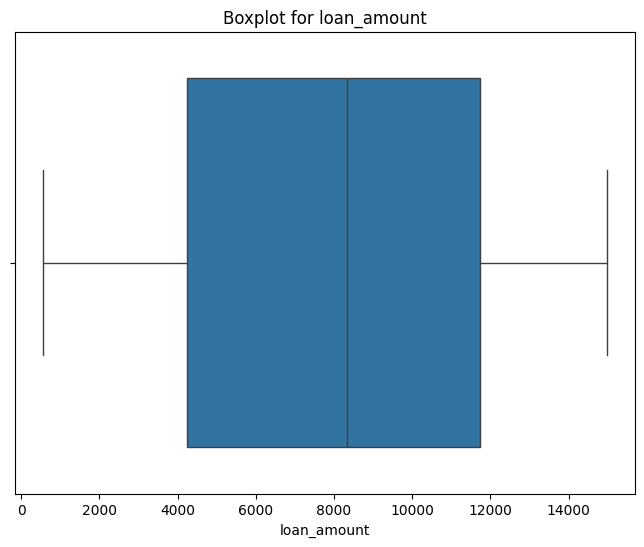

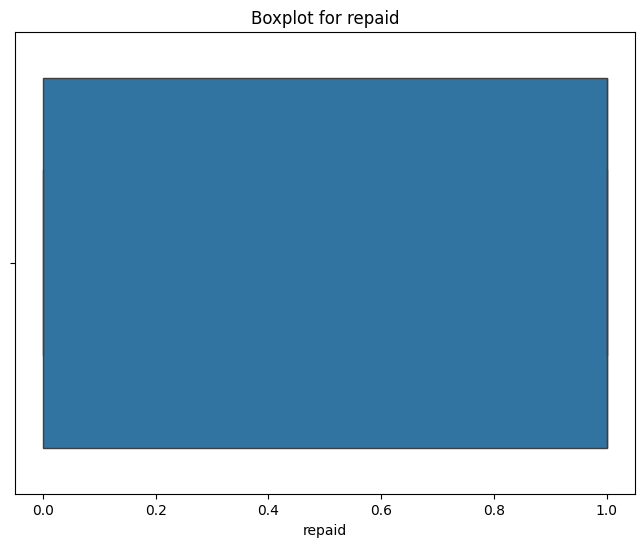

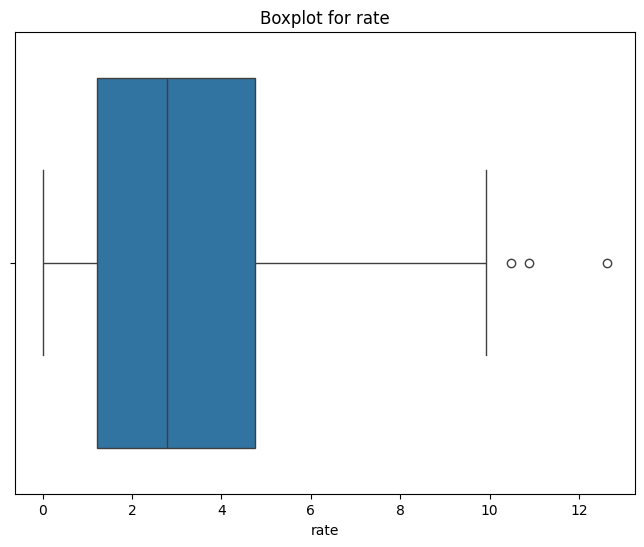

In [ ]:
numeric_columns = ['loan_amount', 'repaid', 'rate']

for col in numeric_columns:
  mpl.figure(figsize=(8, 6))
  sb.boxplot(x=df[col])
  mpl.title(f'Boxplot for {col}')
  mpl.show()

Step 7. If there are a presence of outliers, do the following and explain the results:

	a. Treat them using SQRT transformation

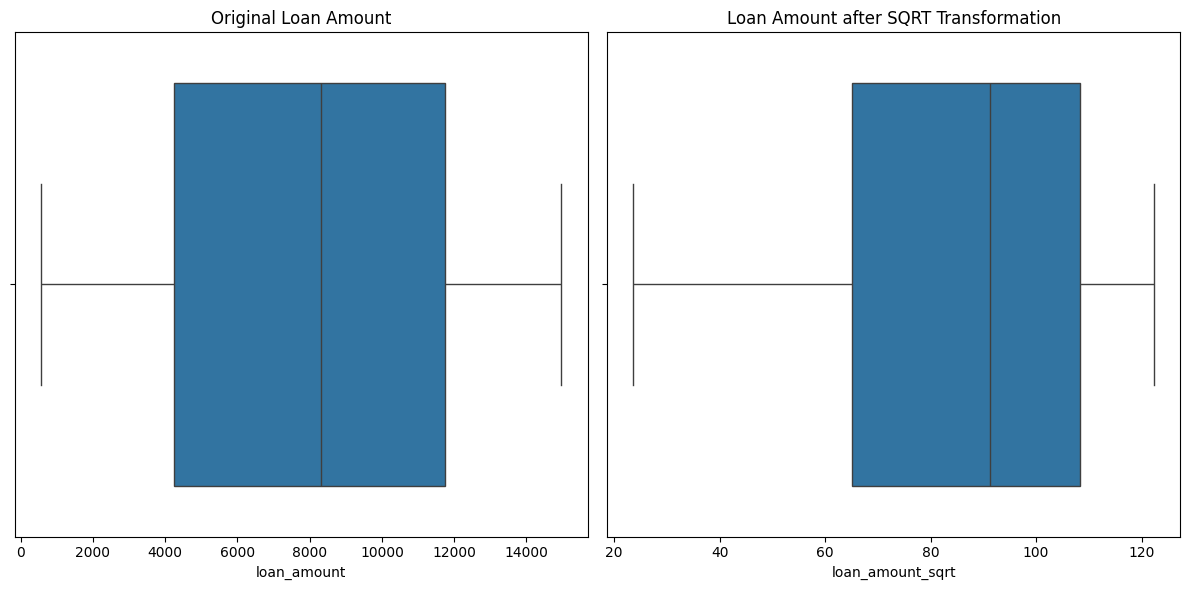

In [ ]:
# Assuming df is your DataFrame
numeric_columns = ['loan_amount']

# Create a new DataFrame with the square root transformation
df_sqrt_transformed = df.copy()
df_sqrt_transformed['loan_amount_sqrt'] = np.sqrt(df['loan_amount'])

# Create side-by-side boxplots
mpl.figure(figsize=(12, 6))

# Original data
mpl.subplot(1, 2, 1)
sb.boxplot(x=df['loan_amount'])
mpl.title('Original Loan Amount')

# Square root transformed data
mpl.subplot(1, 2, 2)
sb.boxplot(x=df_sqrt_transformed['loan_amount_sqrt'])
mpl.title('Loan Amount after SQRT Transformation')

mpl.tight_layout()
mpl.show()

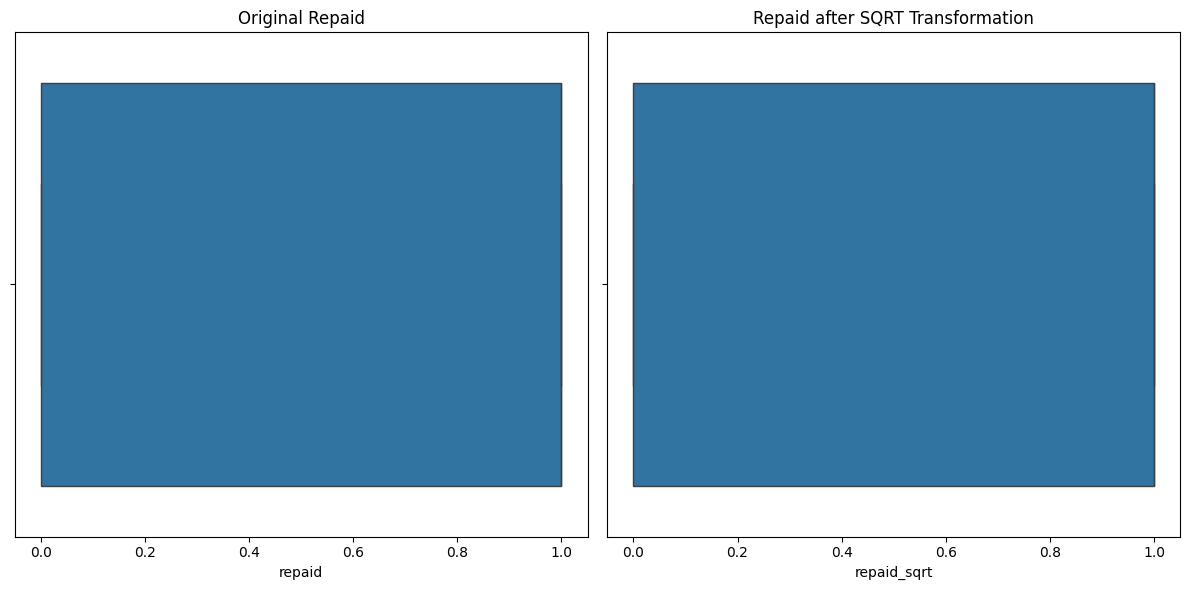

In [ ]:
# Assuming df is your DataFrame
numeric_columns = ['repaid']

# Create a new DataFrame with the square root transformation
df_sqrt_transformed = df.copy()
df_sqrt_transformed['repaid_sqrt'] = np.sqrt(df['repaid'])

# Create side-by-side boxplots
mpl.figure(figsize=(12, 6))

# Original data
mpl.subplot(1, 2, 1)
sb.boxplot(x=df['repaid'])
mpl.title('Original Repaid')

# Square root transformed data
mpl.subplot(1, 2, 2)
sb.boxplot(x=df_sqrt_transformed['repaid_sqrt'])
mpl.title('Repaid after SQRT Transformation')

mpl.tight_layout()
mpl.show()

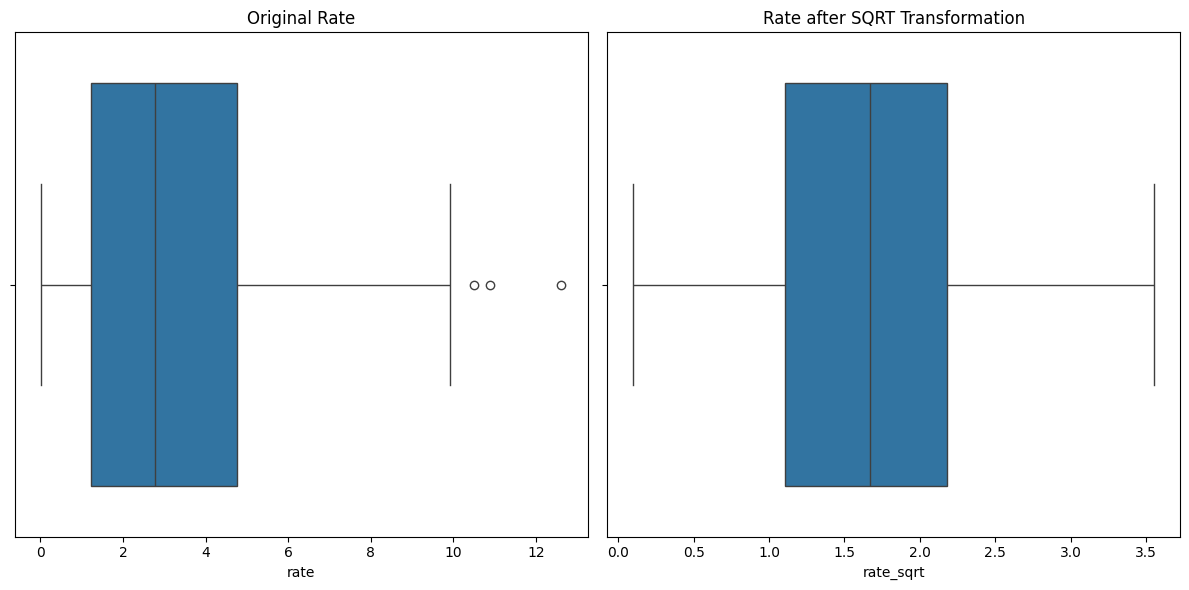

In [ ]:
# Assuming df is your DataFrame
numeric_columns = ['rate']

# Create a new DataFrame with the square root transformation
df_sqrt_transformed = df.copy()
df_sqrt_transformed['rate_sqrt'] = np.sqrt(df['rate'])

# Create side-by-side boxplots
mpl.figure(figsize=(12, 6))

# Original data
mpl.subplot(1, 2, 1)
sb.boxplot(x=df['rate'])
mpl.title('Original Rate')

# Square root transformed data
mpl.subplot(1, 2, 2)
sb.boxplot(x=df_sqrt_transformed['rate_sqrt'])
mpl.title('Rate after SQRT Transformation')

mpl.tight_layout()
mpl.show()

b. Treat them using the capping approach: Z-Score.

In [ ]:
from scipy.stats import zscore

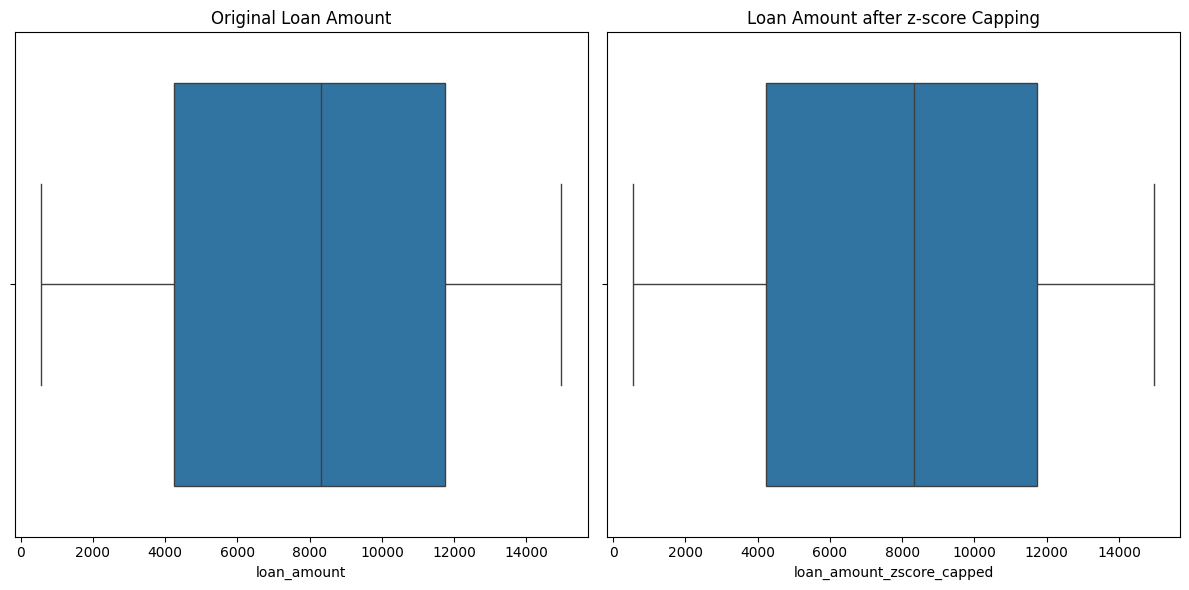

In [ ]:
# Assuming df is your DataFrame
numeric_columns = ('loan_amount')

# Calculate z-scores
z_scores = zscore(df['loan_amount'])

# Create a new DataFrame with z-score capped values
df_zscore_capped = df.copy()
df_zscore_capped['loan_amount_zscore_capped'] = np.where((z_scores > 3) | (z_scores < -3), np.median(df['loan_amount']), df['loan_amount'])

# Create side-by-side boxplots
mpl.figure(figsize=(12, 6))

# Original data
mpl.subplot(1, 2, 1)
sb.boxplot(x=df['loan_amount'])
mpl.title('Original Loan Amount')

# Z-score capped data
mpl.subplot(1, 2, 2)
sb.boxplot(x=df_zscore_capped['loan_amount_zscore_capped'])
mpl.title('Loan Amount after Z-score Capping')

mpl.tight_layout()
mpl.show()

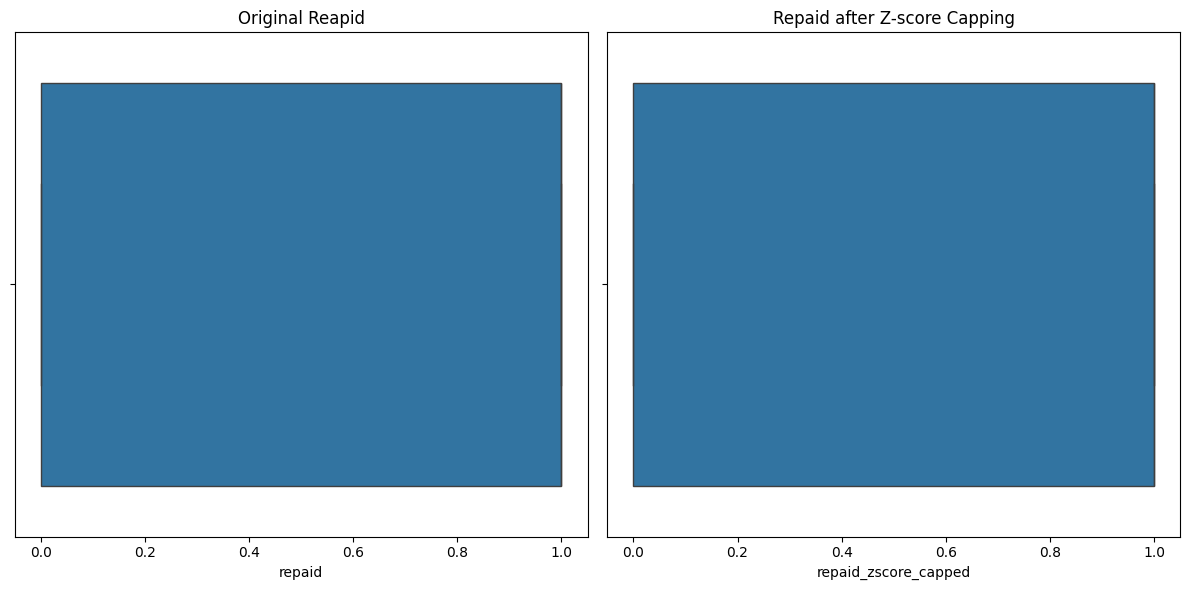

In [ ]:
# Assuming df is your DataFrame
numeric_columns = ('repaid')

# Calculate z-scores
z_scores = zscore(df['repaid'])

# Create a new DataFrame with z-score capped values
df_zscore_capped = df.copy()
df_zscore_capped['repaid_zscore_capped'] = np.where((z_scores > 3) | (z_scores < -3), np.median(df['repaid']), df['repaid'])

# Create side-by-side boxplots
mpl.figure(figsize=(12, 6))

# Original data
mpl.subplot(1, 2, 1)
sb.boxplot(x=df['repaid'])
mpl.title('Original Reapid')

# Z-score capped data
mpl.subplot(1, 2, 2)
sb.boxplot(x=df_zscore_capped['repaid_zscore_capped'])
mpl.title('Repaid after Z-score Capping')

mpl.tight_layout()
mpl.show()

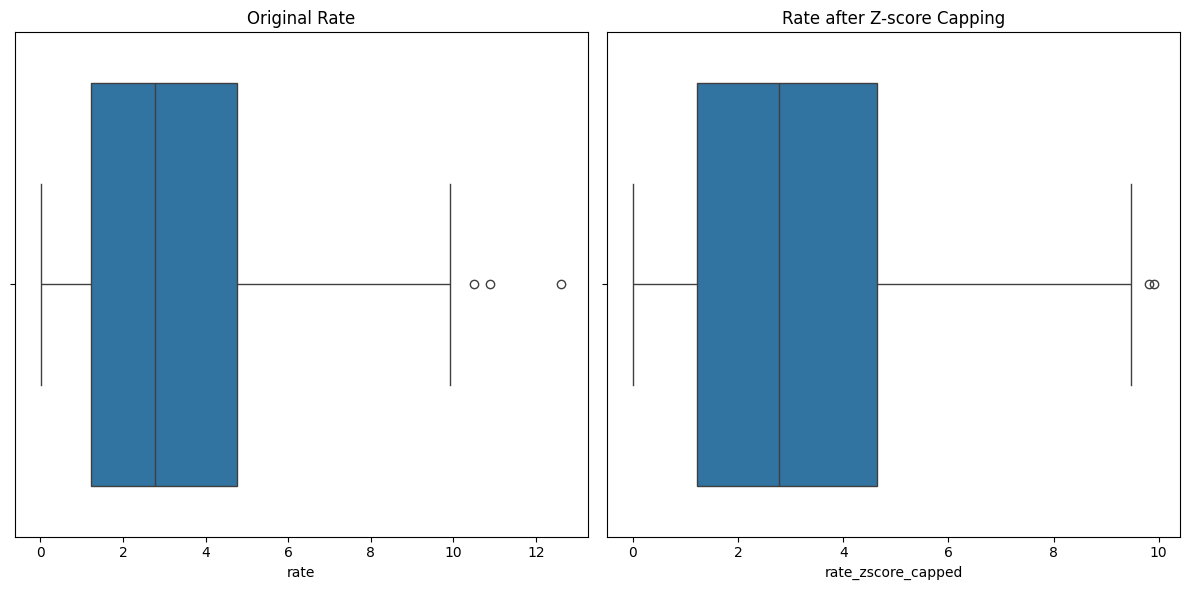

In [ ]:
# Assuming df is your DataFrame
numeric_columns = ('rate')

# Calculate z-scores
z_scores = zscore(df['rate'])

# Create a new DataFrame with z-score capped values
df_zscore_capped = df.copy()
df_zscore_capped['rate_zscore_capped'] = np.where((z_scores > 3) | (z_scores < -3), np.median(df['rate']), df['rate'])

# Create side-by-side boxplots
mpl.figure(figsize=(12, 6))

# Original data
mpl.subplot(1, 2, 1)
sb.boxplot(x=df['rate'])
mpl.title('Original Rate')

# Z-score capped data
mpl.subplot(1, 2, 2)
sb.boxplot(x=df_zscore_capped['rate_zscore_capped'])
mpl.title('Rate after Z-score Capping')

mpl.tight_layout()
mpl.show()

Step 8. Upon checking the datatypes for each columns, for numerical variables, apply scaling using Min-Max Normalization. Display the skewness and kurtosis graphs for Loan Amount and explain the results.

Apply scaling using Min-Max Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

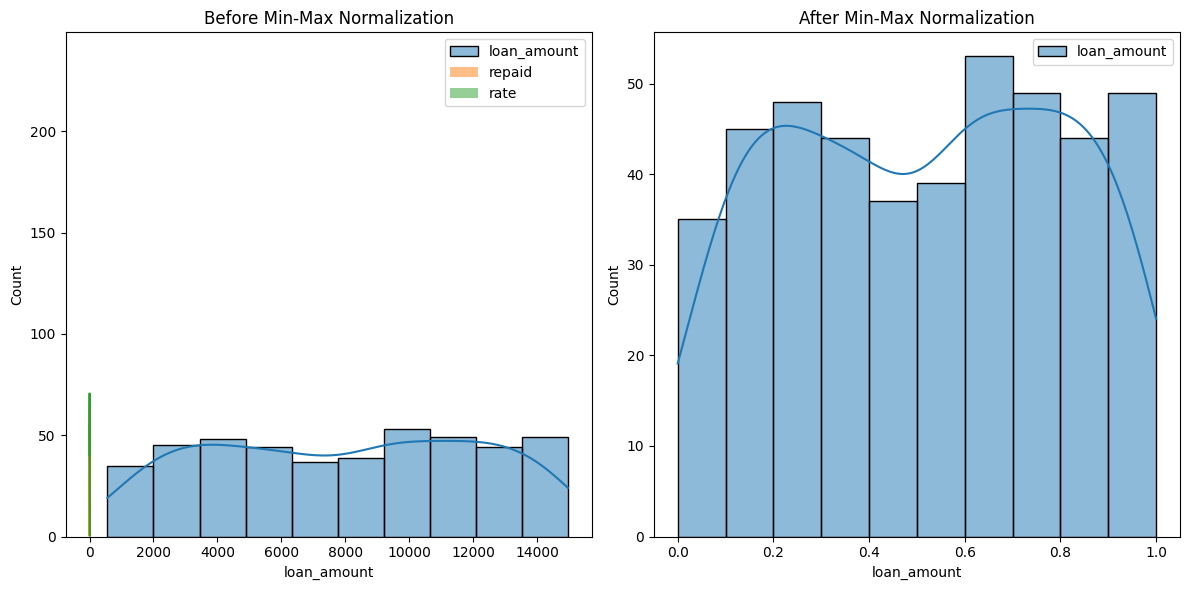

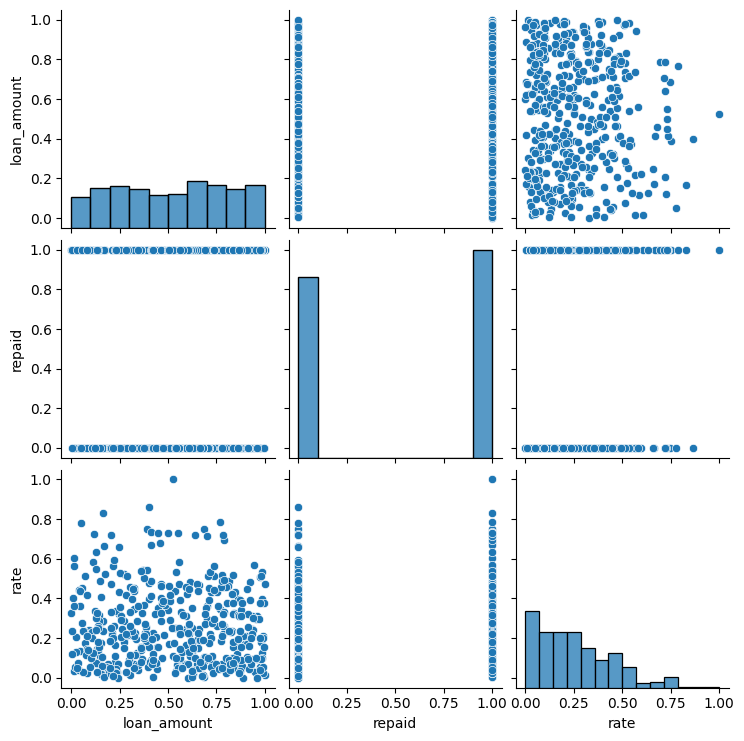

Before Min-Max Normalization:
        loan_amount      repaid        rate
count    443.000000  443.000000  443.000000
mean    7982.311512    0.534989    3.217156
std     4172.891992    0.499338    2.397168
min      559.000000    0.000000    0.010000
25%     4232.500000    0.000000    1.220000
50%     8320.000000    1.000000    2.780000
75%    11739.000000    1.000000    4.750000
max    14971.000000    1.000000   12.620000

After Min-Max Normalization:
       loan_amount      repaid        rate
count   443.000000  443.000000  443.000000
mean      0.515079    0.534989    0.254334
std       0.289543    0.499338    0.190101
min       0.000000    0.000000    0.000000
25%       0.254892    0.000000    0.095956
50%       0.538510    1.000000    0.219667
75%       0.775742    1.000000    0.375892
max       1.000000    1.000000    1.000000


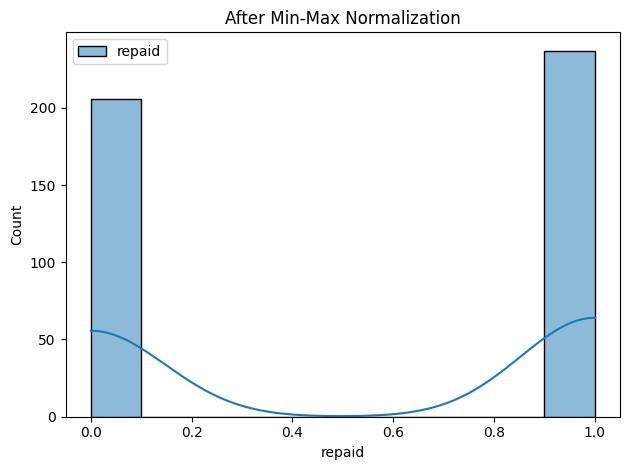

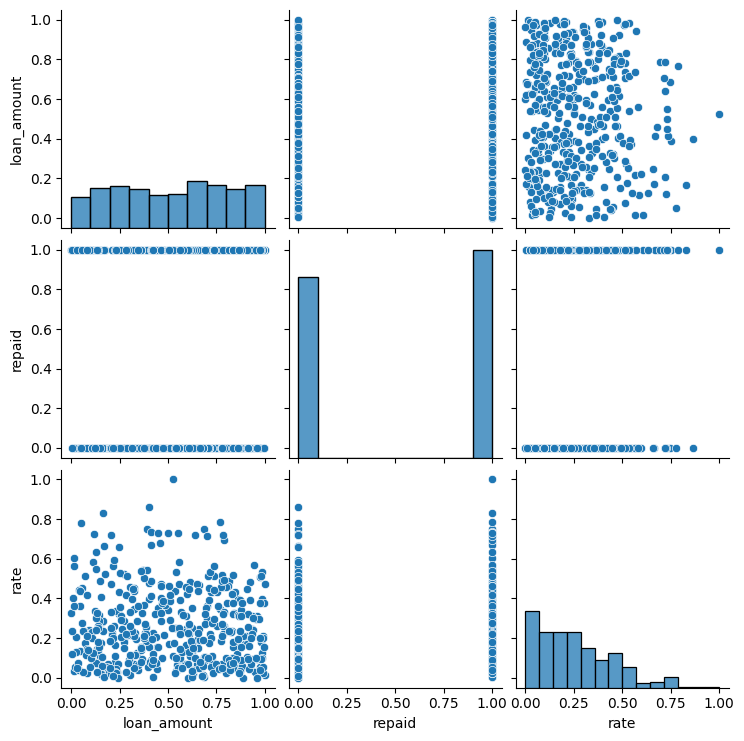

Before Min-Max Normalization:
        loan_amount      repaid        rate
count    443.000000  443.000000  443.000000
mean    7982.311512    0.534989    3.217156
std     4172.891992    0.499338    2.397168
min      559.000000    0.000000    0.010000
25%     4232.500000    0.000000    1.220000
50%     8320.000000    1.000000    2.780000
75%    11739.000000    1.000000    4.750000
max    14971.000000    1.000000   12.620000

After Min-Max Normalization:
       loan_amount      repaid        rate
count   443.000000  443.000000  443.000000
mean      0.515079    0.534989    0.254334
std       0.289543    0.499338    0.190101
min       0.000000    0.000000    0.000000
25%       0.254892    0.000000    0.095956
50%       0.538510    1.000000    0.219667
75%       0.775742    1.000000    0.375892
max       1.000000    1.000000    1.000000


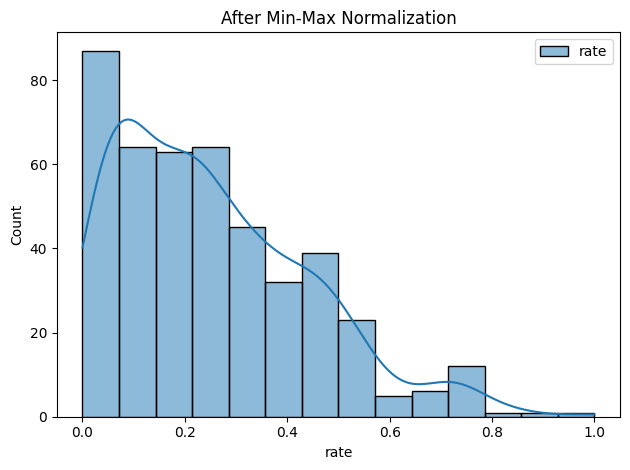

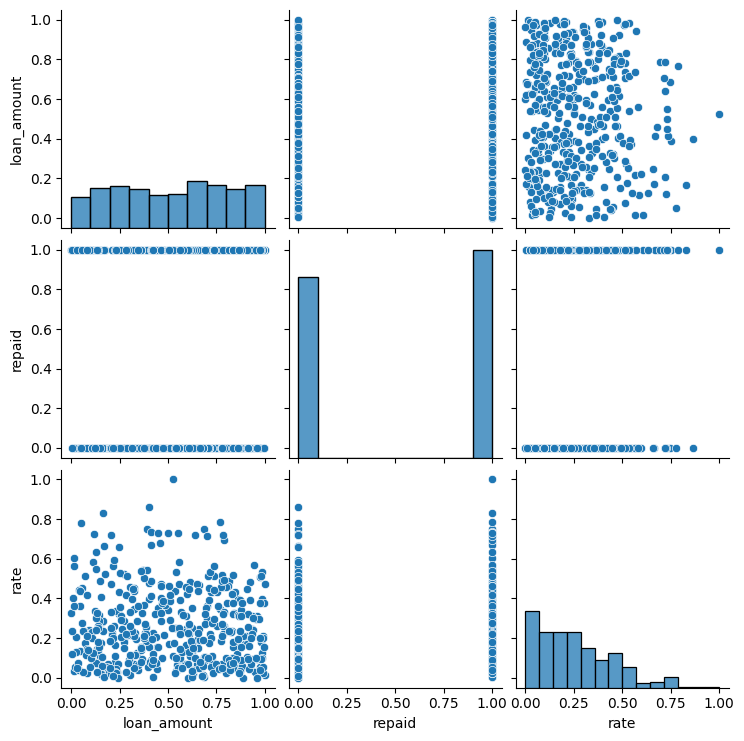

Before Min-Max Normalization:
        loan_amount      repaid        rate
count    443.000000  443.000000  443.000000
mean    7982.311512    0.534989    3.217156
std     4172.891992    0.499338    2.397168
min      559.000000    0.000000    0.010000
25%     4232.500000    0.000000    1.220000
50%     8320.000000    1.000000    2.780000
75%    11739.000000    1.000000    4.750000
max    14971.000000    1.000000   12.620000

After Min-Max Normalization:
       loan_amount      repaid        rate
count   443.000000  443.000000  443.000000
mean      0.515079    0.534989    0.254334
std       0.289543    0.499338    0.190101
min       0.000000    0.000000    0.000000
25%       0.254892    0.000000    0.095956
50%       0.538510    1.000000    0.219667
75%       0.775742    1.000000    0.375892
max       1.000000    1.000000    1.000000


In [ ]:
# Assuming df is your DataFrame
numeric_columns = ['loan_amount', 'repaid', 'rate']

# Create a copy of the DataFrame for visualization
df_normalized = df.copy()

# Apply Min-Max Normalization
scaler = MinMaxScaler()
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Visualize the distributions before and after normalization
mpl.figure(figsize=(12, 6))

# Before normalization
mpl.subplot(1, 2, 1)
for col in numeric_columns:
  sb.histplot(df[col], kde=True, label=col, alpha=0.5)
  mpl.title('Before Min-Max Normalization')
  mpl.legend()

# After normalization
mpl.subplot(1, 2, 2)
for col in numeric_columns:
  sb.histplot(df_normalized[col], kde=True, label=col, alpha=0.5)
  mpl.title('After Min-Max Normalization')
  mpl.legend()

  mpl.tight_layout()
  mpl.show()

  # Assuming df_normalized is your DataFrame after normalization
  sb.pairplot(df_normalized[numeric_columns])
  mpl.show()

  print("Before Min-Max Normalization:")
  print(df[numeric_columns].describe())

  print("\nAfter Min-Max Normalization:")
  print(df_normalized[numeric_columns].describe())

Display the skewness and kurtosis graphs for Loan Amount and explain the results.

In [ ]:
from scipy.stats import skew, kurtosis

Skewness of Loan Amount: -0.03997926438774986
Kurtosis of Loan Amount: -0.03997926438774986


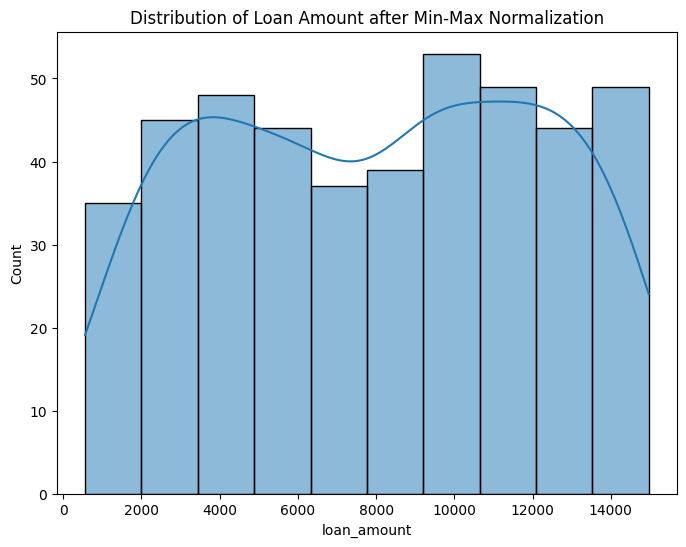

In [ ]:
# Assuming df is your DataFrame
loan_amount_skewness = skew(df['loan_amount'])
loan_amount_kurtosis = kurtosis(df['loan_amount'])

print(f"Skewness of Loan Amount: {loan_amount_skewness}")
print(f"Kurtosis of Loan Amount: {loan_amount_skewness}")

# You can also visualize the distribution
mpl.figure(figsize=(8, 6))
sb.histplot(df['loan_amount'], kde=True)
mpl.title('Distribution of Loan Amount after Min-Max Normalization')
mpl.show()

Step 9. As for the categorical features, apply encoding of categorical variables into dummy variables using pd.get_dummies approach. Show the first five (5) rows.

In [ ]:
# Assuming df is your DataFrame
categorical_columns = ['loan_type']

# Apply pd.get dummies
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first five rows
print(df_encoded.head())

           loan_amount  repaid  loan_id  loan_start    loan_end  rate  \
client_id                                                               
46109            13672       0    10243  2002-04-16  2003-12-20  2.15   
46109             9794       0    10984  2003-10-21  2005-07-17  1.25   
46109            12734       1    10990  2006-02-01  2007-07-05  0.68   
46109            12518       1    10596  2010-12-08  2013-05-05  1.24   
46109            14049       1    11415  2010-07-07  2012-05-21  3.13   

           loan_type_credit  loan_type_home  loan_type_other  
client_id                                                     
46109                     0               1                0  
46109                     1               0                0  
46109                     0               1                0  
46109                     0               0                0  
46109                     1               0                0  


Step 10. Create new derived features to calculate the tenure of the loan by using the loan_start and loan_end.

In [ ]:
# Assuming df is your DataFrame
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

df['loan_tenure_days'] = (df['loan_end'] - df['loan_start']).dt.days

print(df[['loan_start', 'loan_end', 'loan_tenure_days']].head())

          loan_start   loan_end  loan_tenure_days
client_id                                        
46109     2002-04-16 2003-12-20               613
46109     2003-10-21 2005-07-17               635
46109     2006-02-01 2007-07-05               519
46109     2010-12-08 2013-05-05               879
46109     2010-07-07 2012-05-21               684


Step 11. Split the data into training and test sets with 80-20 division.

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
features = df.drop(['loan_amount', 'loan_id', 'loan_start', 'loan_end'], axis=1)
target = df['loan_amount']

# Check the shapes of features and target
print("Features shape:", features.shape)
print("Target shape:", target.shape)

# Split the data into training and testing sets (80-20 division)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#Check the shapes of the resulting sets
print("x_train shape: ", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Features shape: (443, 4)
Target shape: (443,)
x_train shape:  (354, 4)
x_test shape: (89, 4)
y_train shape: (354,)
y_test shape: (89,)
